In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.optim import SGD, RMSprop, Adam

# Гиперпараметры
BATCH_SIZE = 64
LEARNING_RATE = 1e-3
EPOCHS = 50

def load_data(batch_size):
    train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
    test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=transforms.ToTensor())
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size)
    return train_loader, test_loader

train_loader, test_loader = load_data(BATCH_SIZE)

# Определение модели нейронной сети
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.model(x)

# Функция для обучения модели за одну эпоху
def train_epoch(loader, model, criterion, optimizer):
    model.train()
    total_loss = 0
    for X, y in loader:
        preds = model(X)  # Прогнозы модели
        loss = criterion(preds, y)  # Вычисление ошибки

        optimizer.zero_grad()  # Обнуление градиентов
        loss.backward()  # Обратное распространение ошибки
        optimizer.step()  # Обновление параметров

        total_loss += loss.item()

    avg_loss = total_loss / len(loader)
    print(f"Средняя ошибка на обучении: {avg_loss:.4f}")
    return avg_loss

# Функция для оценки модели на тестовом наборе данных
def test(loader, model, criterion):
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in loader:
            preds = model(X)
            loss = criterion(preds, y)
            total_loss += loss.item()
            correct += (preds.argmax(1) == y).sum().item()

    avg_loss = total_loss / len(loader)
    accuracy = correct / len(loader.dataset)
    print(f"Тестовая ошибка: {avg_loss:.4f}, Точность: {accuracy:.2%}")
    return avg_loss, accuracy

# Функция для запуска эксперимента с разными оптимизаторами
def experiment(optimizer_cls, epochs, train_loader, test_loader):
    model = SimpleNN()
    optimizer = optimizer_cls(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.CrossEntropyLoss()
    train_losses, test_losses = [], []

    for epoch in range(epochs):
        print(f"\nЭпоха {epoch + 1}/{epochs} с оптимизатором {optimizer_cls.__name__}")
        train_loss = train_epoch(train_loader, model, criterion, optimizer)
        test_loss, accuracy = test(test_loader, model, criterion)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

    return train_losses, test_losses

optimizers = {"SGD": SGD, "RMSprop": RMSprop, "Adam": Adam}
results = {}

for name, opt_cls in optimizers.items():
    print(f"\nНачинаем обучение с оптимизатором {name}")
    train_losses, test_losses = experiment(opt_cls, EPOCHS, train_loader, test_loader)
    results[name] = {"train_losses": train_losses, "test_losses": test_losses}



100%|██████████| 26.4M/26.4M [00:01<00:00, 19.1MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 310kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.51MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.02MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw


Начинаем обучение с оптимизатором SGD

Эпоха 1/50 с оптимизатором SGD
Средняя ошибка на обучении: 2.2315
Тестовая ошибка: 2.1569, Точность: 41.96%

Эпоха 2/50 с оптимизатором SGD
Средняя ошибка на обучении: 2.0404
Тестовая ошибка: 1.8969, Точность: 51.40%

Эпоха 3/50 с оптимизатором SGD
Средняя ошибка на обучении: 1.7105
Тестовая ошибка: 1.5335, Точность: 59.32%

Эпоха 4/50 с оптимизатором SGD
Средняя ошибка на обучении: 1.3829
Тестовая ошибка: 1.2640, Точность: 61.71%

Эпоха 5/50 с оптимизатором SGD
Средняя ошибка на обучении: 1.1663
Тестовая ошибка: 1.0969, Точность: 64.64%

Эпоха 6/50 с оптимизатором SGD
Средняя ошибка на обучении: 1.0295
Тестовая ошибка: 0.9889, Точность: 65.42%

Эпоха 7/50 с оптимизатором SGD
Средняя ошибка на обучении: 0.9386
Тестовая ошибка: 0.9153, Точность: 66.63%

Эпоха 8/50 с оптимизатором SGD
Средняя ошибка на обучении: 0.8747
Тестовая ошибка: 0.8624, Точность: 67.43%

Эпо

Визуализация графиков

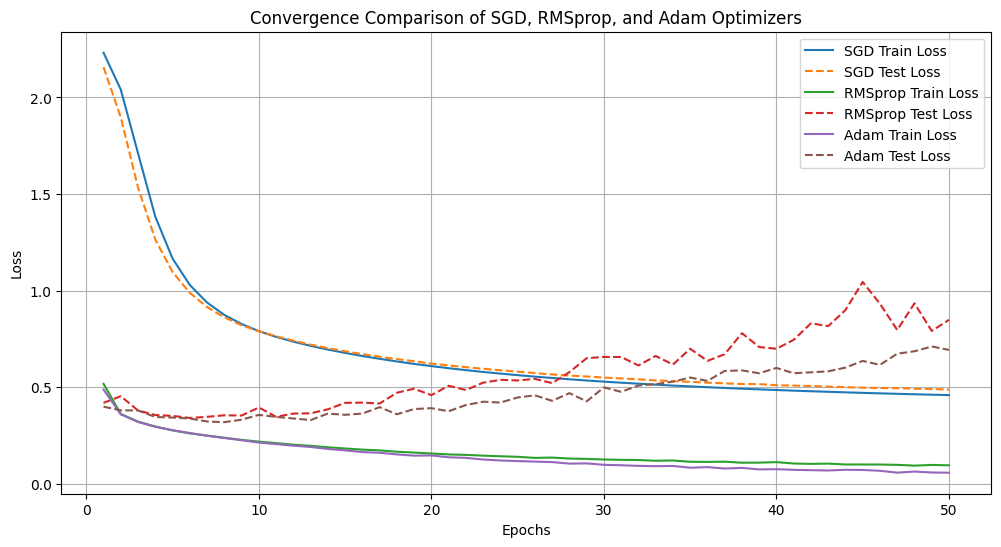

In [2]:

plt.figure(figsize=(12, 6))

for opt_name, losses in results.items():
    plt.plot(range(1, EPOCHS + 1), losses["train_losses"], label=f"{opt_name} Train Loss")
    plt.plot(range(1, EPOCHS + 1), losses["test_losses"], linestyle="--", label=f"{opt_name} Test Loss")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence Comparison of SGD, RMSprop, and Adam Optimizers')
plt.grid(True)
plt.legend()
plt.show()

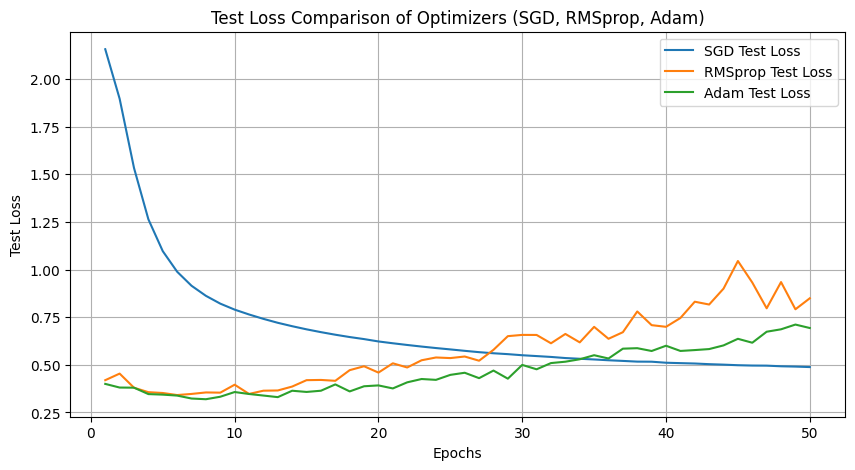

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for opt_name, losses in results.items():
    plt.plot(range(1, EPOCHS + 1), losses["test_losses"], label=f"{opt_name} Test Loss")

plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison of Optimizers (SGD, RMSprop, Adam)')
plt.grid(True)
plt.legend()

plt.show()


Стохастический градиентный спуск (SGD) демонстрирует быстрое снижение ошибки на начальных этапах обучения, но затем его сходимость замедляется, и ошибка может начать колебаться или вовсе перестать уменьшаться.

В отличие от него, RMSprop и Adam, используя адаптивные скорости обучения, обеспечивают более быструю и стабильную сходимость.

Adam, благодаря комбинации адаптивных методов и момента импульса, часто показывает лучшие результаты, обеспечивая ускоренную и плавную сходимость.